In [1]:
import os
import random
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


C:\Users\HKoros\AppData\Local\Temp\ipykernel_10692\2165792683.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(color_bins) - 1)
c:\Users\HKoros\Anaconda\envs\geo\lib\site-packages\matplotlib\colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


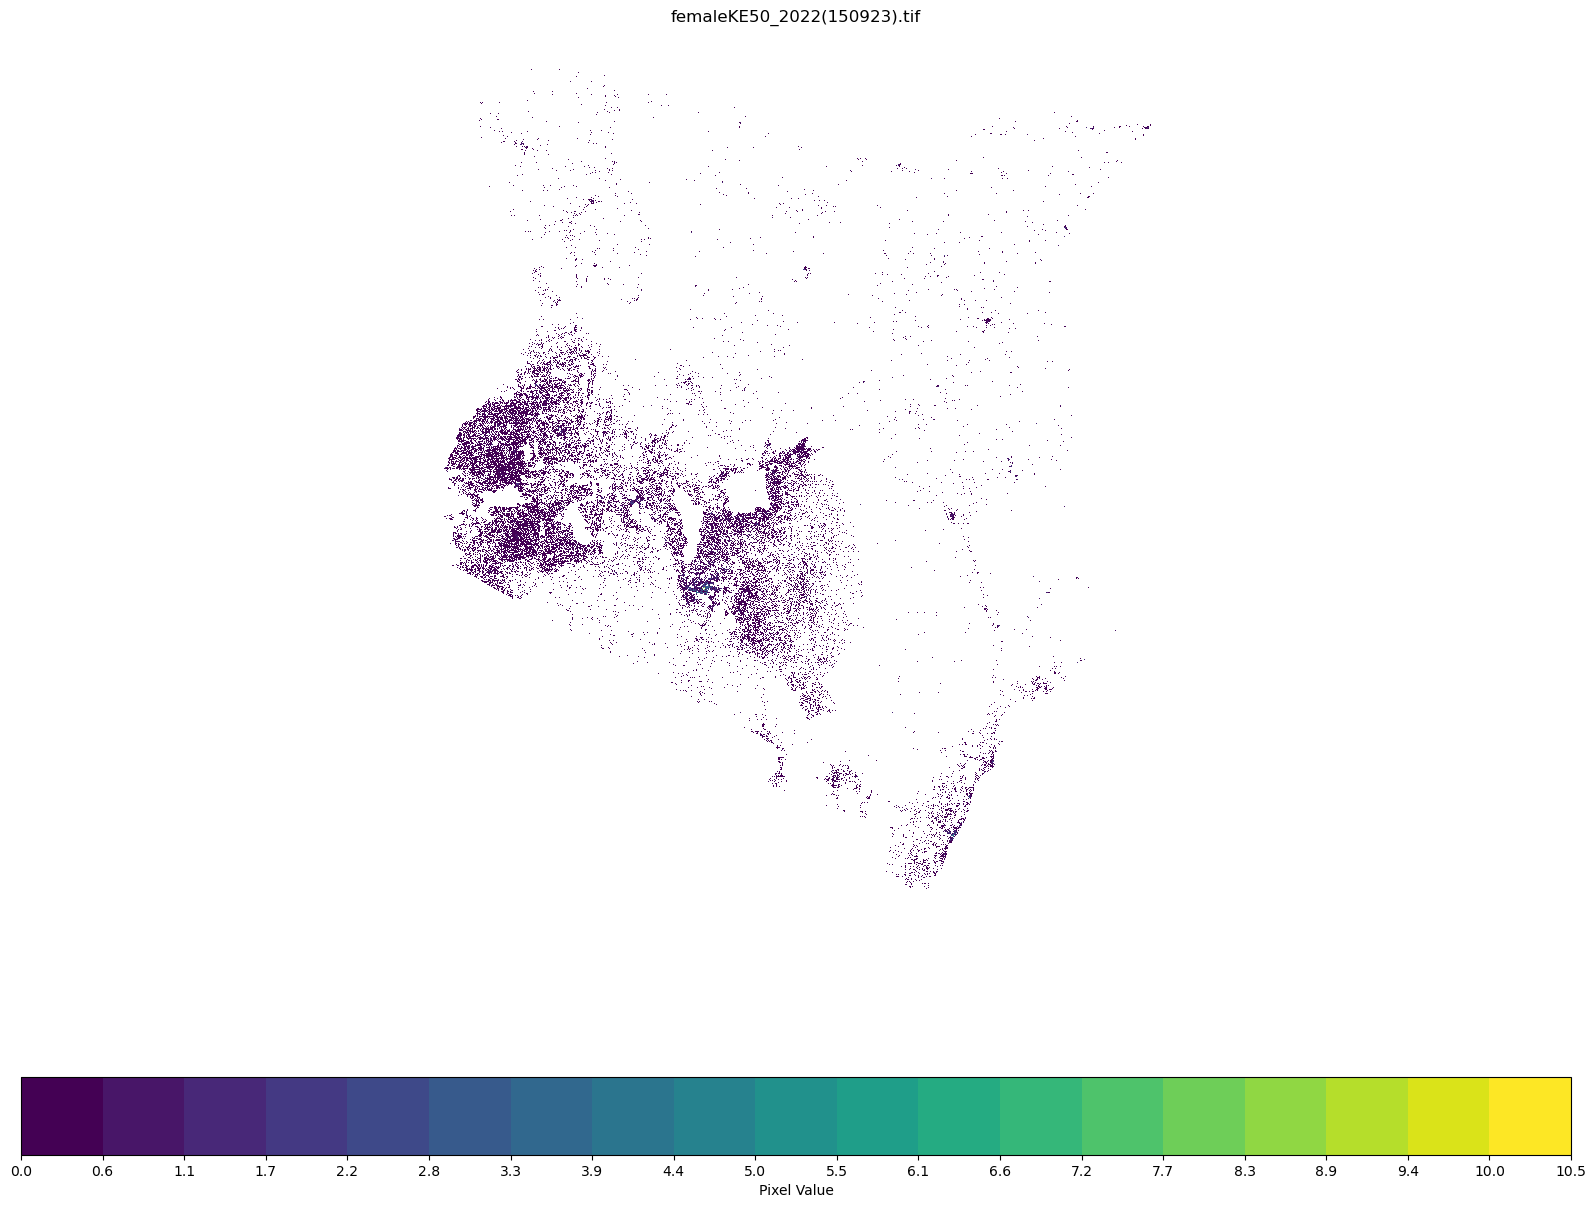

In [4]:
def plot_random_tiff(folder_path):
    # List all files in the folder
    tiff_files = [file for file in os.listdir(folder_path) if file.endswith('.tiff') or file.endswith('.tif')]

    # Check if there are TIFF files in the folder
    if not tiff_files:
        print("No TIFF files found in the folder.")
        return

    # Choose a random TIFF file
    random_tiff_file = random.choice(tiff_files)
    tiff_path = os.path.join(folder_path, random_tiff_file)

    # Read the TIFF image using rasterio
    with rasterio.open(tiff_path) as src:
        image = src.read(1, masked=True)  # Read the first band and mask NaN values
        min_value = np.nanmin(image)
        max_value = np.nanmax(image)  # Compute the maximum value in the raster


  # Get the dimensions of the image
    height, width = image.shape
    
    
     # Define color bins based on the maximum value
    color_bins = np.linspace(min_value, max_value, num=20)  # Adjust the number of bins as needed
    colormap = cm.get_cmap('viridis', len(color_bins) - 1)
    colormap.set_bad(color='white')  # Set NaN values to white

    # Create a larger figure and plot the image with custom colormap and color bins
    plt.figure(figsize=(20, 16))  # Adjust the figsize here for a larger figure
    plt.imshow(image, cmap=colormap, interpolation='nearest', vmin=0, vmax=max_value,
               extent=[0, width, 0, height])  # Set extent to match image dimensions
    plt.title(f'{random_tiff_file}')
    
    # Set the aspect ratio to be equal to prevent stretching
    plt.gca().set_aspect('equal', adjustable='box')
    # Create a horizontal colorbar with custom color bins
    cbar = plt.colorbar(ticks=color_bins, boundaries=color_bins, format='%1.1f', orientation='horizontal')
    cbar.set_label('Pixel Value')  # Set a label for the colorbar
    
    # Set the tick labels for the colorbar
    cbar.ax.set_xticklabels([f'{color_bins[i]:.1f}' for i in range(len(color_bins))])
    
    plt.axis('off')
    plt.show()
    # Folder containing TIFF files
folder_path = 'C:/Users/HKoros/OneDrive - Kemri Wellcome Trust/Python2023/WorldPopKE_UTM_37S/2022_UTM_37S'

# Plot a random TIFF file
plot_random_tiff(folder_path)


C:\Users\HKoros\AppData\Local\Temp\ipykernel_10692\1826424857.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(color_bins) - 1)


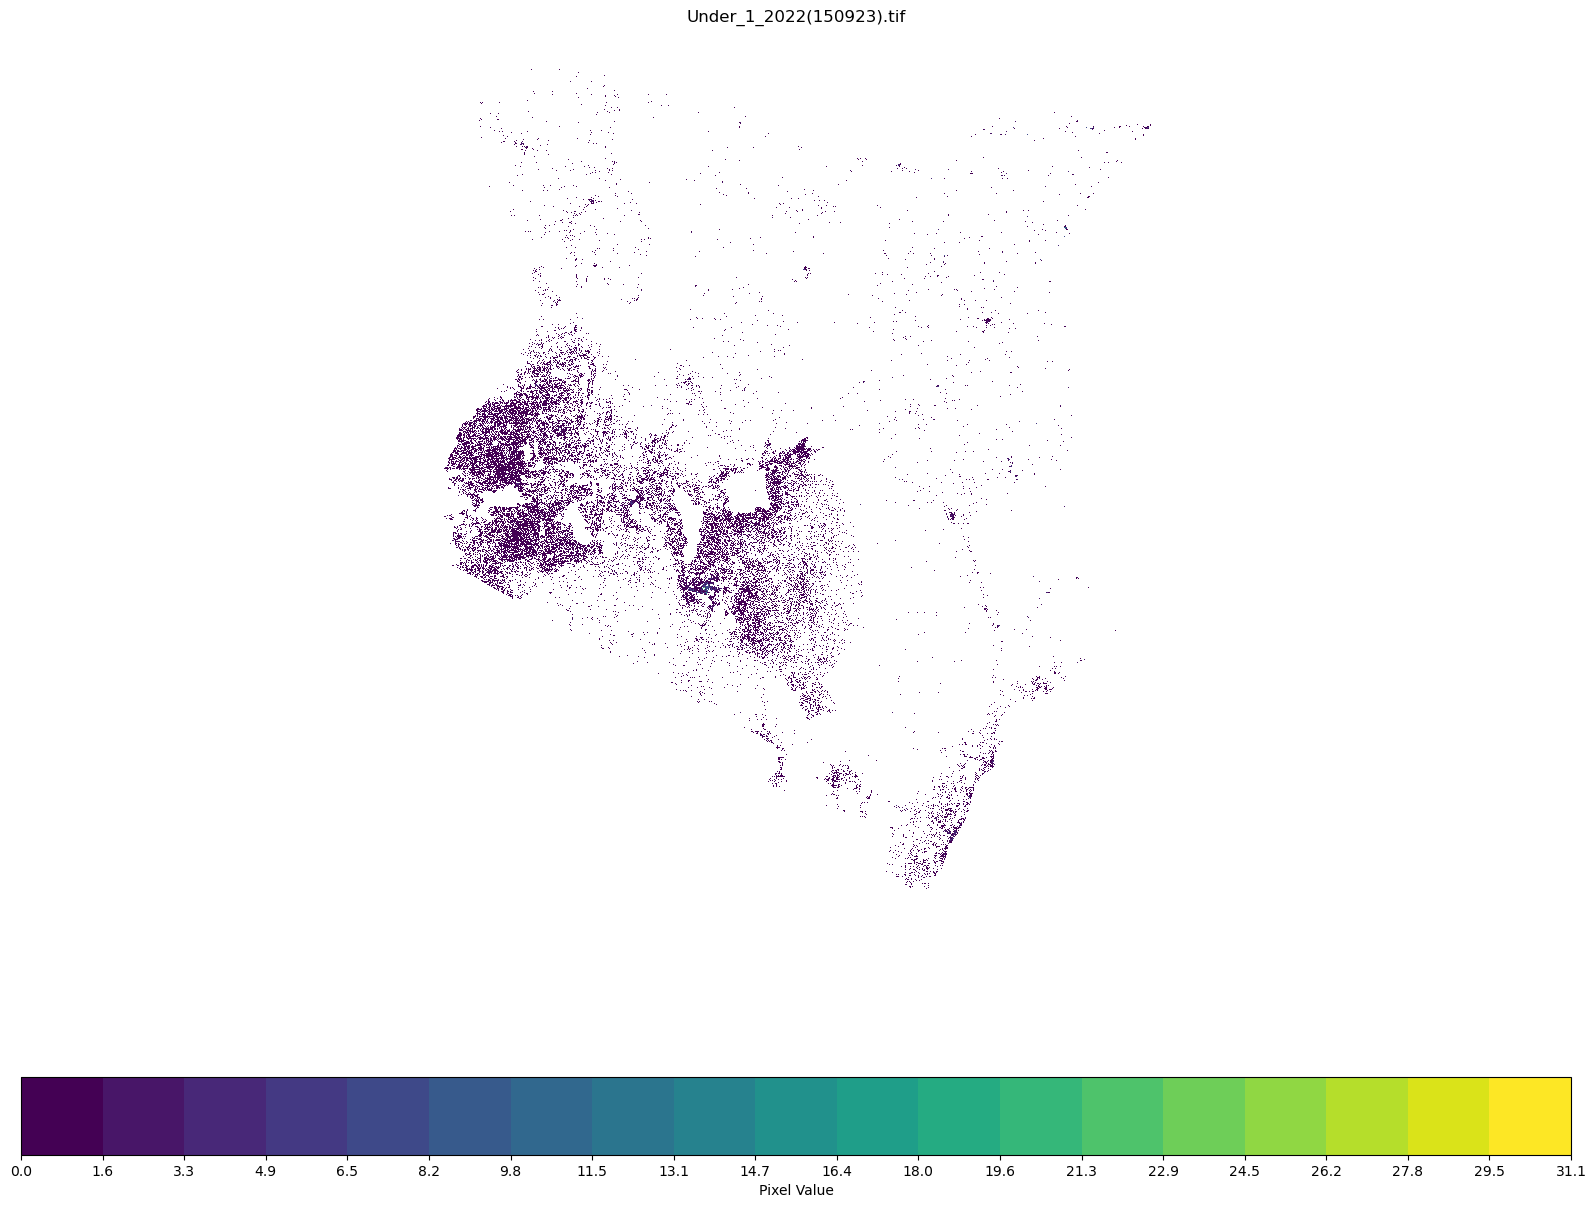